# Import Data

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.utils import to_categorical
from sklearn.datasets import fetch_openml

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

random_state = 3

2024-05-28 15:15:58.301432: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
def plot_model_history(history):
    """Plot the training and validation history for a TensorFlow network"""

    # Extract loss and accuracy
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    acc = history.history["MAPE"]
    val_acc = history.history["val_MAPE"]
    n_epochs = len(loss)

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    ax[0].plot(np.arange(n_epochs), loss, label="Training")
    ax[0].plot(np.arange(n_epochs), val_loss, label="Validation")
    ax[0].legend()
    ax[0].set_xlabel("Epoch")
    ax[0].set_ylabel("Loss")

    ax[1].plot(np.arange(n_epochs), acc, label="Training")
    ax[1].plot(np.arange(n_epochs), val_acc, label="Validation")
    ax[1].legend()
    ax[1].set_xlabel("Epoch")
    ax[1].set_ylabel("Mean Absolute Percent Error")


In [5]:
NN_data = pd.read_csv("Data/NNData.csv")
NN_data

,Index,DT,Energy,Jan,Feb,Mar,Apr,May,Jun,Jul,...,BankHols,RetailHols,WkBeforeXMas,WkAfterXMas,Trend2010,AvgDB,LagDB,Lag2DB,AvgWind,AvgClouds
0,0,1/1/17,242.69,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.00,46.77,36.66,36.72,5.24,4.39
1,1,1/2/17,257.06,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.01,45.10,46.77,36.66,5.66,8.00
2,2,1/3/17,265.35,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.01,45.37,45.10,46.77,5.63,7.75
3,3,1/4/17,253.79,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.01,48.87,45.37,45.10,8.61,3.71
4,4,1/5/17,305.91,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.01,34.49,48.87,45.37,3.84,6.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1090,12/27/19,262.49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.99,47.83,43.47,39.38,2.08,3.76
1091,1091,12/28/19,238.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.99,51.19,47.83,43.47,1.76,1.86
1092,1092,12/29/19,240.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.99,53.24,51.19,47.83,3.33,7.78
1093,1093,12/30/19,235.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,10.00,62.12,53.24,51.19,9.17,3.87


In [6]:
X = NN_data.values[:,3:]
y = NN_data.values[:,2]
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

(array([109., 210., 223., 192., 138.,  77.,  21.,   6.,   6.,   3.]),
 array([200.13 , 225.726, 251.322, 276.918, 302.514, 328.11 , 353.706,
        379.302, 404.898, 430.494, 456.09 ]),
 <BarContainer object of 10 artists>)

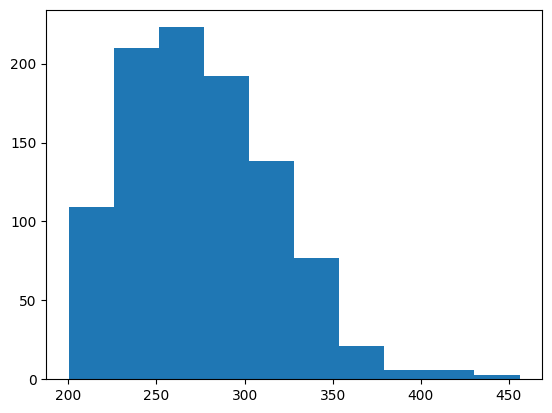

In [7]:
plt.hist(y_train_val)

In [8]:
X_train_two = np.asarray(X_train_val).astype('float32')
scaler_x = StandardScaler()
X_train_two = scaler_x.fit_transform(X_train_two)
X_test_two = np.asarray(X_test).astype('float32')
X_test_two = scaler_x.transform(X_test_two)


y_train_two = np.asarray(y_train_val).astype('float32').reshape(-1, 1)
scaler_y = StandardScaler()
y_train_two = scaler_y.fit_transform(y_train_two)
y_test_two = np.asarray(y_test).astype('float32')
#y_test_two = scaler_y.transform(y_test_two)

In [7]:
#X_train_two[:,26]

In [9]:
print(np.shape(X_train_two))
print(np.shape(y_train_two))

(985, 27)
(985, 1)


In [76]:
#print(y_train_two)

In [10]:
# Initialize the model. 
model = Sequential(name="sequantial1")
# For each layer you need to add the number of Neurons and the activation. 
# We have 27 features so that goes in input_shape
model.add(Dense(5, input_shape=(27,), name="fc1"))
model.add(Activation(activation="sigmoid", name="relu2"))
model.add(Dense(1, name="fc4"))
model.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequantial1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ fc1 (Dense)                     │ (None, 5)              │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu2 (Activation)              │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc4 (Dense)                     │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 146 (584.00 B)

 Trainable params: 146 (584.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer="sgd", loss=["MSE"], metrics=["MAPE"])
history = model.fit(X_train_two, y_train_two, batch_size=1024, epochs=100, validation_split=0.25, shuffle=True, verbose=0)

0.9788849353790283
189.67657470703125


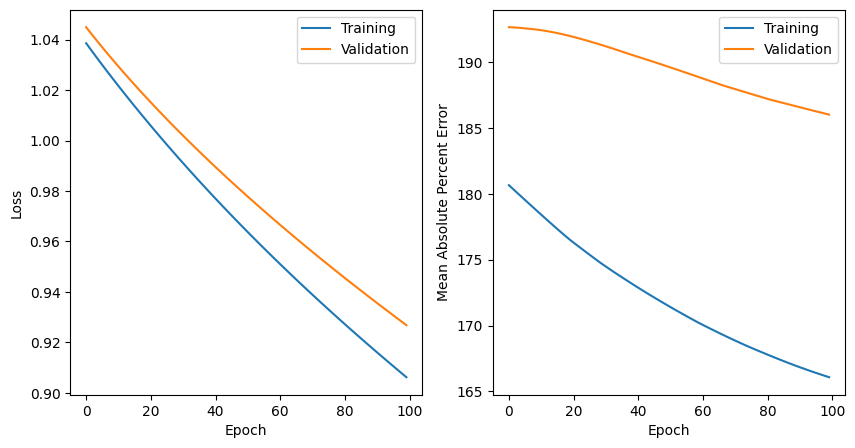

In [12]:
plot_model_history(history)
print(str(history.history["val_loss"][49]))
print(str(history.history["val_MAPE"][49]))

In [13]:
np.shape(X_test_two)
y_keras = model.predict(X_test_two, batch_size=10, verbose=0)

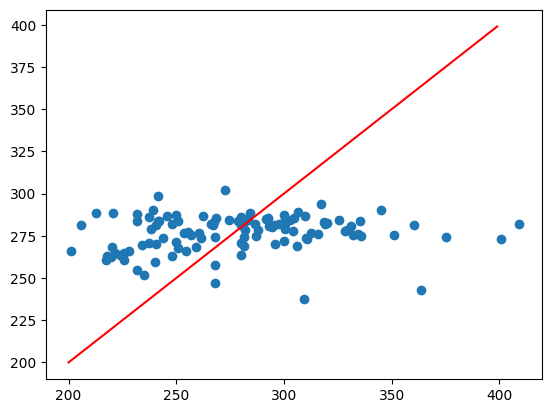

In [14]:
plt.scatter(y_test, scaler_y.inverse_transform(y_keras))
plt.plot(np.arange(200,400), np.arange(200,400), color = "r")
plt.show()